In [21]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv("Factors_ affecting_ university_student_grades_dataset.csv")
df

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,NaN,Some College,75000.0,A,78.0,NaN,16.0,Law,Private,...,Positive,Yes,Yes,Auditory,No,No,Medium,3.0,Low,B
10060,19.0,M,College,NaN,B,NaN,Medium,5.0,Science,Public,...,Positive,Yes,Yes,Visual,Yes,No,Low,4.0,High,A
10061,20.0,M,NaN,30000.0,B,97.0,Medium,7.0,Engineering,Public,...,Positive,Yes,Yes,Kinesthetic,No,No,High,3.0,High,A
10062,21.0,F,College,50000.0,B,75.0,Medium,15.0,NaN,Public,...,Negative,Yes,No,Kinesthetic,Yes,Yes,Low,4.0,Medium,A


1. Altair Boxplot – Grade Distribution by Gender

In [23]:
alt.data_transformers.disable_max_rows()
df_viz1 = df[['Gender', 'Grades']].dropna()
grade_order = ['F', 'D', 'C', 'B', 'A']
df_viz1 = df_viz1[df_viz1['Grades'].isin(grade_order)]
df_viz1['Grade_Value'] = df_viz1['Grades'].map({'F': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4})

chart = alt.Chart(df_viz1).mark_boxplot(extent='min-max').encode(
    x=alt.X('Gender:N', title='Gender'),
    y=alt.Y('Grade_Value:Q', title='Grade (A=4 to F=0)'),
    color=alt.Color('Gender:N'),
    tooltip=['Gender', 'Grades']
).properties(
    title='Grade Distribution by Gender',
    width=400,
    height=300
).interactive()

chart.show()
chart.save('altair_chart.html')



alt.Chart(...)

This boxplot shows that while both genders have overlapping distributions, females tend to have slightly higher median grades. This insight can help highlight potential structural or behavioral differences across gender lines.



2. Plotly Scatter Plot – Study Hours vs Grades
python

In [24]:
import plotly.express as px

df['Study_Hours'] = pd.to_numeric(df['Study_Hours'], errors='coerce')
df_viz2 = df[['Study_Hours', 'Grades', 'Major']].dropna()
df_viz2 = df_viz2[df_viz2['Grades'].isin(grade_order)]
df_viz2['Grade_Num'] = df_viz2['Grades'].map({'F': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4})

fig = px.scatter(
    df_viz2,
    x='Study_Hours',
    y='Grade_Num',
    color='Major',
    title='Study Hours vs Grades by Major',
    labels={'Grade_Num': 'Grade (A=4 to F=0)', 'Study_Hours': 'Study Hours'},
    hover_data=['Grades']
)
fig.show()
fig.write_html("plotly_chart.html")

ImportError: cannot import name 'all_exprs_are_scalar_like' from 'narwhals._expression_parsing' (c:\Users\max\AppData\Local\Programs\Python\Python311\Lib\site-packages\narwhals\_expression_parsing.py)

This scatter plot shows a general upward trend: more study hours tend to correlate with better grades. However, the correlation varies across majors, suggesting the need for tailored academic support by field of study.

4. Seaborn Heatmap – Correlation of Variables

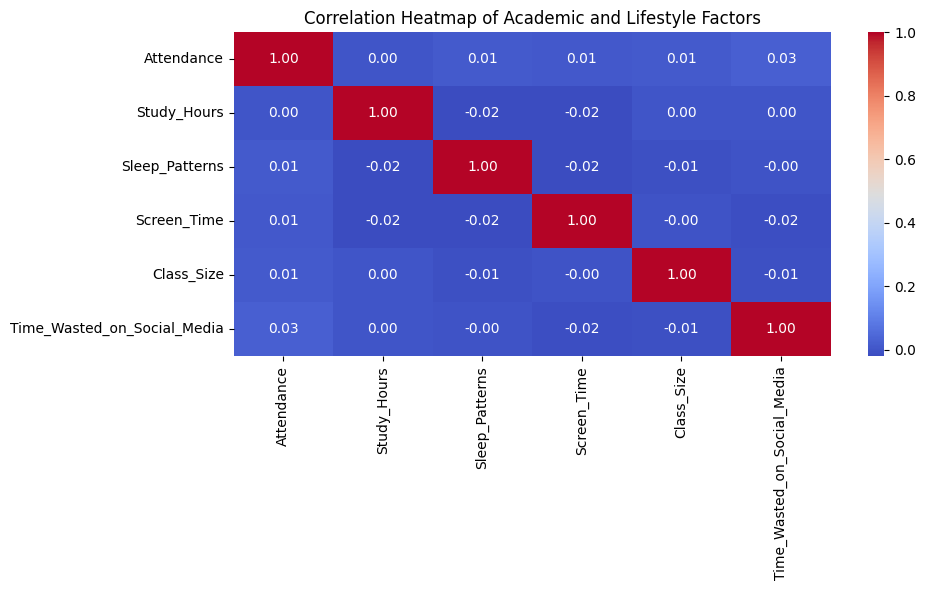

In [28]:
df_corr = df[['Attendance', 'Study_Hours', 'Sleep_Patterns', 'Screen_Time', 'Class_Size', 'Time_Wasted_on_Social_Media']].copy()
df_corr = df_corr.apply(pd.to_numeric, errors='coerce').dropna()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Academic and Lifestyle Factors')
plt.tight_layout()
plt.savefig("heatmap.png")
plt.show()





5. Altair Layered Chart – Motivation & Self-Esteem vs Grade

In [32]:
df_viz5 = df[['Motivation', 'Self_Esteem', 'Grades']].dropna()
df_viz5 = df_viz5[df_viz5['Grades'].isin(grade_order)]
df_viz5['Grade_Value'] = df_viz5['Grades'].map({'F': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4})

motivation_chart = alt.Chart(df_viz5).mark_bar(opacity=0.6).encode(
    x='Motivation:N',
    y='average(Grade_Value):Q',
    color=alt.value('teal')
)

esteem_chart = alt.Chart(df_viz5).mark_line(point=True).encode(
    x='Self_Esteem:N',
    y='average(Grade_Value):Q',
    color=alt.value('orange')
)

combined_chart = (motivation_chart + esteem_chart).properties(
    title='Average Grade vs Motivation and Self-Esteem',
    width=500
)
combined_chart.save('altair_combined_chart.html')
combined_chart.show()


alt.LayerChart(...)

Students with higher levels of motivation and self-esteem tend to achieve higher grades. This emphasizes the psychological side of academic performance, which is often underappreciated.

